Let’s work with an example. The data consists of 388 cars from the 2004 model year, with
18 features. Eight features are binary indicators; the other 11 features are numerical.

In [73]:
import itertools
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [74]:
car = pd.read_csv('04cars-fixed.csv')
X = car.iloc[:,10:]
cols = list(X.columns)
labels=car[["Brand",'Country']]
le = preprocessing.LabelEncoder()
labelen = labels.apply(le.fit_transform)

In [75]:
labelen.head()

,Brand,Country
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [76]:
cols

['Retail',
 'Engine',
 'Cylinders',
 'Horsepower',
 'CityMPG',
 'HighwayMPG',
 'Weight',
 'Wheelbase',
 'Length',
 'Width']

In [77]:
from sklearn.preprocessing import StandardScaler
X = X.astype(float)
X_std = StandardScaler().fit_transform(X)

### Let's apply sklearn PCA ....

In [78]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
pca.fit(X_std)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)
ct = [i for i in range(0,len(pca.explained_variance_ratio_))]

In [79]:
ct

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [80]:
print(pca.explained_variance_ratio_)

[0.66613702 0.14815772 0.07617541 0.03093459 0.02740946 0.01970727
 0.01269551 0.00857098 0.00652073 0.0036913 ]


In [81]:
print(pca.explained_variance_)

[6.67862766 1.48541552 0.76372757 0.31014733 0.27480473 0.19758323
 0.12728395 0.08593184 0.06537626 0.03700866]


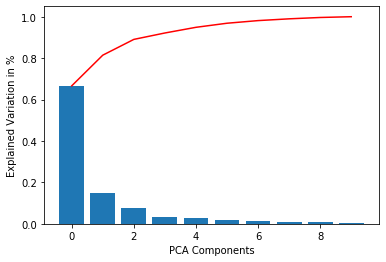

In [82]:
plt.bar(ct, pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variation in %')
plt.show()

In [83]:
sklearn_pca = PCA(n_components=4)
X_dim = sklearn_pca.fit_transform(X_std)

In [84]:
X_dim.shape

(387, 4)

In [90]:
pd.DataFrame(X_dim).to_csv('xdim.csv')

In [69]:
ld = sklearn_pca.components_.T
grr=pd.DataFrame(ld, index = cols)

In [70]:
#pd.DataFrame(X_dim).to_csv('xdim.csv')

In [71]:
print(grr.shape)
print(grr.head(20))

(10, 4)
                   0         1         2         3
Retail     -0.246236  0.494246  0.408473  0.471678
Engine     -0.359154  0.054407  0.136980 -0.508787
Cylinders  -0.341696  0.152264  0.210615 -0.588538
Horsepower -0.315089  0.371447  0.237221  0.177510
CityMPG     0.323409 -0.138609  0.523886 -0.177365
HighwayMPG  0.319714 -0.158059  0.584486 -0.053317
Weight     -0.353821 -0.115890 -0.145573  0.027784
Wheelbase  -0.289540 -0.465928  0.145434  0.232910
Length     -0.278871 -0.468211  0.234936  0.226611
Width      -0.317390 -0.312518  0.011623 -0.009804


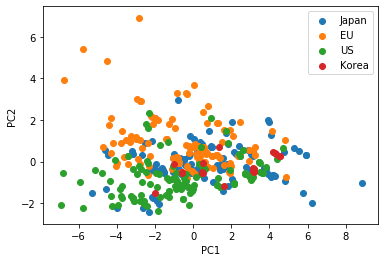

In [72]:
fig, ax = plt.subplots()
group = labels['Country']
for g in list(group.unique()):
    i = np.where(group == g)
    ax.scatter(X_dim[i,0], X_dim[i,1], label=g)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.savefig('pc1.png')
plt.show()

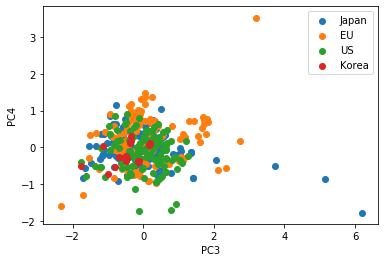

In [53]:
fig, ax = plt.subplots()
group = labels['Country']
for g in list(group.unique()):
    i = np.where(group == g)
    ax.scatter(X_dim[i,2], X_dim[i,3], label=g)
ax.set_xlabel('PC3')
ax.set_ylabel('PC4')
ax.legend()
plt.savefig('pc3.png')
plt.show()

In [54]:
X_dim[X_dim>2]=np.NaN

In [55]:
X_dim.shape

(387, 4)

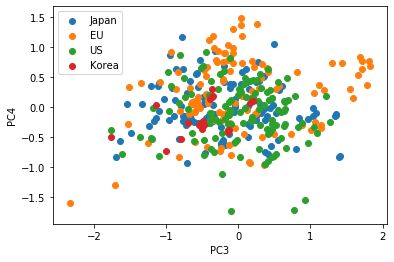

In [56]:
fig, ax = plt.subplots()
group = labels['Country']
for g in list(group.unique()):
    i = np.where(group == g)
    ax.scatter(X_dim[i,2], X_dim[i,3], label=g)
ax.set_xlabel('PC3')
ax.set_ylabel('PC4')
ax.legend()
plt.savefig('pc3.png')
plt.show()

#### Eigendecomposition - Computing Eigenvectors and Eigenvalues

In [21]:
## Covariance Matrix

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00259067  0.59516292  0.65256456  0.83480725 -0.48322822 -0.46708624
   0.47318525  0.20388757  0.20741401  0.30657776]
 [ 0.59516292  1.00259067  0.91380217  0.78063381 -0.70720458 -0.70924073
   0.81374315  0.63310578  0.62619919  0.72798023]
 [ 0.65256456  0.91380217  1.00259067  0.79319322 -0.67225076 -0.66590928
   0.73307527  0.55412436  0.54777886  0.62043749]
 [ 0.83480725  0.78063381  0.79319322  1.00259067 -0.67354097 -0.65215312
   0.63269296  0.39765349  0.3824138   0.50074076]
 [-0.48322822 -0.70720458 -0.67225076 -0.67354097  1.00259067  0.9435568
  -0.73807279 -0.4823728  -0.46879757 -0.5884077 ]
 [-0.46708624 -0.70924073 -0.66590928 -0.65215312  0.9435568   1.00259067
  -0.79064988 -0.45578706 -0.39011719 -0.58425028]
 [ 0.47318525  0.81374315  0.73307527  0.63269296 -0.73807279 -0.79064988
   1.00259067  0.75286072  0.65458468  0.80871719]
 [ 0.20388757  0.63310578  0.55412436  0.39765349 -0.4823728  -0.45578706
   0.75286072  1.00259067 

In [22]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.24467041  0.49627952 -0.41044164  0.47107209  0.15176034  0.07623742
   0.45635443 -0.05722303  0.20928845  0.13889904]
 [-0.35921553  0.05388759 -0.13465082 -0.50913041 -0.03731889 -0.01034387
  -0.01512641  0.00791406  0.66000896 -0.39155171]
 [-0.34180586  0.15248064 -0.20915091 -0.5800822  -0.23111204  0.06946864
   0.18973576  0.00609739 -0.43159831  0.44623575]
 [-0.3151568   0.37191425 -0.2362672   0.16781443 -0.04894501 -0.16806138
  -0.73270845 -0.00554367 -0.26349386 -0.20349556]
 [ 0.32355194 -0.1384387  -0.52291806 -0.18484393  0.3047947   0.25360092
  -0.06344492 -0.60194424 -0.1329148  -0.16521675]
 [ 0.31984821 -0.15769369 -0.58383562 -0.05902979  0.04049198 -0.07736195
  -0.04116715  0.72029613  0.01732878  0.00593808]
 [-0.35397919 -0.11573467  0.14497026  0.02481332  0.40274746  0.54882351
   0.12698534  0.30626403 -0.33617476 -0.39156478]
 [-0.28985273 -0.46394065 -0.14937403  0.24600803 -0.18632257  0.46008799
  -0.3210936  -0.04263872  0.28476379

#### Correlation Matrix

Especially, in the field of "Finance," the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix:

In [23]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.24467041  0.49627952 -0.41044164  0.47107209  0.15176034  0.07623742
   0.45635443 -0.05722303  0.20928845  0.13889904]
 [-0.35921553  0.05388759 -0.13465082 -0.50913041 -0.03731889 -0.01034387
  -0.01512641  0.00791406  0.66000896 -0.39155171]
 [-0.34180586  0.15248064 -0.20915091 -0.5800822  -0.23111204  0.06946864
   0.18973576  0.00609739 -0.43159831  0.44623575]
 [-0.3151568   0.37191425 -0.2362672   0.16781443 -0.04894501 -0.16806138
  -0.73270845 -0.00554367 -0.26349386 -0.20349556]
 [ 0.32355194 -0.1384387  -0.52291806 -0.18484393  0.3047947   0.25360092
  -0.06344492 -0.60194424 -0.1329148  -0.16521675]
 [ 0.31984821 -0.15769369 -0.58383562 -0.05902979  0.04049198 -0.07736195
  -0.04116715  0.72029613  0.01732878  0.00593808]
 [-0.35397919 -0.11573467  0.14497026  0.02481332  0.40274746  0.54882351
   0.12698534  0.30626403 -0.33617476 -0.39156478]
 [-0.28985273 -0.46394065 -0.14937403  0.24600803 -0.18632257  0.46008799
  -0.3210936  -0.04263872  0.28476379

#### Singular Vector Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [24]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.24467041,  0.49627952,  0.41044164,  0.47107209, -0.15176034,
         0.07623742, -0.45635443,  0.13889904, -0.20928845, -0.05722303],
       [-0.35921553,  0.05388759,  0.13465082, -0.50913041,  0.03731889,
        -0.01034387,  0.01512641, -0.39155171, -0.66000896,  0.00791406],
       [-0.34180586,  0.15248064,  0.20915091, -0.5800822 ,  0.23111204,
         0.06946864, -0.18973576,  0.44623575,  0.43159831,  0.00609739],
       [-0.3151568 ,  0.37191425,  0.2362672 ,  0.16781443,  0.04894501,
        -0.16806138,  0.73270845, -0.20349556,  0.26349386, -0.00554367],
       [ 0.32355194, -0.1384387 ,  0.52291806, -0.18484393, -0.3047947 ,
         0.25360092,  0.06344492, -0.16521675,  0.1329148 , -0.60194424],
       [ 0.31984821, -0.15769369,  0.58383562, -0.05902979, -0.04049198,
        -0.07736195,  0.04116715,  0.00593808, -0.01732878,  0.72029613],
       [-0.35397919, -0.11573467, -0.14497026,  0.02481332, -0.40274746,
         0.54882351, -0.12698534, -0.39156478

After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [25]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
ct = [i for i in range(0,len(var_exp))]

In [26]:
print(var_exp)

[66.56151719039151, 14.828090058937796, 7.6296128805658965, 3.1238440598034956, 2.7317968968234574, 1.9756001927791422, 1.2679791708942325, 0.8609146399220188, 0.6513354995677624, 0.369309410314701]


Text(0, 0.5, 'Explained Variation in %')

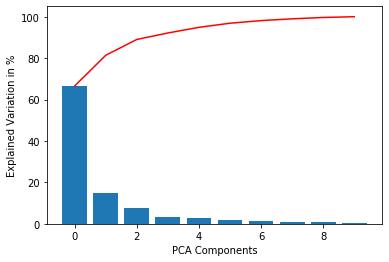

In [27]:
plt.bar(ct, var_exp)
plt.plot(cum_var_exp, 'r')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variation in %')